# Analyse de l'incidence de la varicelle

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [9]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [10]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202042          7   2993     1283    4703       5           2   
1     202041          7   3974     2106    5842       6           3   
2     202040          7   2078      675    3481       3           1   
3     202039          7   1049      237    1861       2           1   
4     202038          7   2253      782    3724       3           1   
5     202037          7   1584      405    2763       2           0   
6     202036          7    919      100    1738       1           0   
7     202035          7    828        0    1694       1           0   
8     202034          7   2272      371    4173       3           0   
9     202033          7   1284      177    2391       2           0   
10    202032          7   2650      689    4611       4           1   
11    202031          7   1303      100    2506       2           0   
12    202030          7   1385       75    2695       2           0   
13    202029          7    841       10    1672       1           0   
14    202028          7    728        0    1515       1           0   
15    202027          7    986      149    1823       1           0   
16    202026          7    694        0    1454       1           0   
17    202025          7    228        0     597       0           0   
18    202024          7    388        0     959       1           0   
19    202023          7    558        1    1115       1           0   
20    202022          7    277        0     633       0           0   
21    202021          7    602       36    1168       1           0   
22    202020          7    824       20    1628       1           0   
23    202019          7    310        0     753       0           0   
24    202018          7    849       98    1600       1           0   
25    202017          7    272        0     658       0           0   
26    202016          7    758       78    1438       1           0   
27    202015          7   1918      675    3161       3           1   
28    202014          7   3879     2227    5531       6           3   
29    202013          7   7326     5236    9416      11           8   
...      ...        ...    ...      ...     ...     ...         ...   
1529  199126          7  17608    11304   23912      31          20   
1530  199125          7  16169    10700   21638      28          18   
1531  199124          7  16171    10071   22271      28          17   
1532  199123          7  11947     7671   16223      21          13   
1533  199122          7  15452     9953   20951      27          17   
1534  199121          7  14903     8975   20831      26          16   
1535  199120          7  19053    12742   25364      34          23   
1536  199119          7  16739    11246   22232      29          19   
1537  199118          7  21385    13882   28888      38          25   
1538  199117          7  13462     8877   18047      24          16   
1539  199116          7  14857    10068   19646      26          18   
1540  199115          7  13975     9781   18169      25          18   
1541  199114          7  12265     7684   16846      22          14   
1542  199113          7   9567     6041   13093      17          11   
1543  199112          7  10864     7331   14397      19          13   
1544  199111          7  15574    11184   19964      27          19   
1545  199110          7  16643    11372   21914      29          20   
1546  199109          7  13741     8780   18702      24          15   
1547  199108          7  13289     8813   17765      23          15   
1548  199107          7  12337     8077   16597      22          15   
1549  199106          7  10877     7013   14741      19          12   
1550  199105          7  10442     6544   14340      18          11   
1551  199104          7   7913     4563   11263      14           8   
1552  199103          7  15387    10484   20290      27          18   
1553  199102          7  16277  

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [12]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202042          7   2993     1283    4703       5           2   
1     202041          7   3974     2106    5842       6           3   
2     202040          7   2078      675    3481       3           1   
3     202039          7   1049      237    1861       2           1   
4     202038          7   2253      782    3724       3           1   
5     202037          7   1584      405    2763       2           0   
6     202036          7    919      100    1738       1           0   
7     202035          7    828        0    1694       1           0   
8     202034          7   2272      371    4173       3           0   
9     202033          7   1284      177    2391       2           0   
10    202032          7   2650      689    4611       4           1   
11    202031          7   1303      100    2506       2           0   
12    202030          7   1385       75    2695       2           0   
13    202029          7    841       10    1672       1           0   
14    202028          7    728        0    1515       1           0   
15    202027          7    986      149    1823       1           0   
16    202026          7    694        0    1454       1           0   
17    202025          7    228        0     597       0           0   
18    202024          7    388        0     959       1           0   
19    202023          7    558        1    1115       1           0   
20    202022          7    277        0     633       0           0   
21    202021          7    602       36    1168       1           0   
22    202020          7    824       20    1628       1           0   
23    202019          7    310        0     753       0           0   
24    202018          7    849       98    1600       1           0   
25    202017          7    272        0     658       0           0   
26    202016          7    758       78    1438       1           0   
27    202015          7   1918      675    3161       3           1   
28    202014          7   3879     2227    5531       6           3   
29    202013          7   7326     5236    9416      11           8   
...      ...        ...    ...      ...     ...     ...         ...   
1529  199126          7  17608    11304   23912      31          20   
1530  199125          7  16169    10700   21638      28          18   
1531  199124          7  16171    10071   22271      28          17   
1532  199123          7  11947     7671   16223      21          13   
1533  199122          7  15452     9953   20951      27          17   
1534  199121          7  14903     8975   20831      26          16   
1535  199120          7  19053    12742   25364      34          23   
1536  199119          7  16739    11246   22232      29          19   
1537  199118          7  21385    13882   28888      38          25   
1538  199117          7  13462     8877   18047      24          16   
1539  199116          7  14857    10068   19646      26          18   
1540  199115          7  13975     9781   18169      25          18   
1541  199114          7  12265     7684   16846      22          14   
1542  199113          7   9567     6041   13093      17          11   
1543  199112          7  10864     7331   14397      19          13   
1544  199111          7  15574    11184   19964      27          19   
1545  199110          7  16643    11372   21914      29          20   
1546  199109          7  13741     8780   18702      24          15   
1547  199108          7  13289     8813   17765      23          15   
1548  199107          7  12337     8077   16597      22          15   
1549  199106          7  10877     7013   14741      19          12   
1550  199105          7  10442     6544   14340      18          11   
1551  199104          7   7913     4563   11263      14           8   
1552  199103          7  15387    10484   20290      27          18   
1553  199102          7  16277  

In [16]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [17]:
sorted_data = data.set_index('period').sort_index()

In [18]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

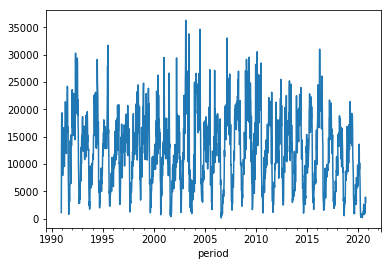

In [19]:
sorted_data['inc'].plot()

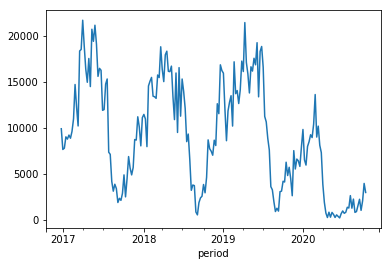

In [20]:
sorted_data['inc'][-200:].plot()

#  Etude de l'incidence annuelle

In [26]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

In [28]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    #assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

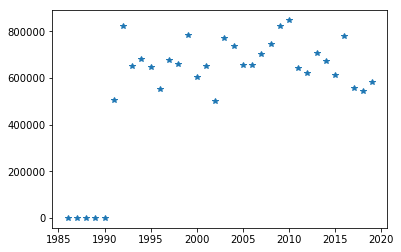

In [29]:
yearly_incidence.plot(style='*')

In [30]:
yearly_incidence.sort_values()

1986         0
1987         0
1988         0
1989         0
1990         0
2002    502271
1991    507329
2018    543281
1996    553859
2017    557449
2019    584926
2000    605096
2015    613286
2012    620315
2011    645042
1995    648598
2001    650660
1993    653058
2005    654308
2006    657482
1998    660316
2014    673458
1997    679308
1994    682920
2007    701566
2013    708874
2004    736266
2008    745701
2003    770211
2016    780645
1999    784963
1992    821558
2009    822819
2010    848236
dtype: int64

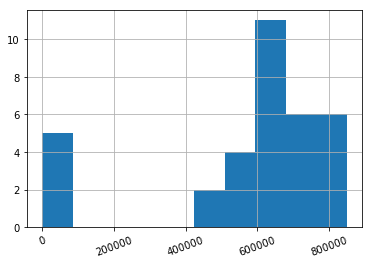

In [31]:
yearly_incidence.hist(xrot=20)